# NYC Schools Perceptions

This is the first R project in part 3 of the Data quest R course.
The main goal of this project is to clean and analyze a significant real-world dataset: Data on parent, student, and teacher perceptions of New York City schools collected using surveys (https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8/about_data).

With the main questions we are seeking to answer through our analysis are:

*   Do student, teacher, and parent perceptions of NYC school quality appear to be related to demographic and academic success metrics?

*   Do students, teachers, and parents have similar perceptions of NYC school quality?

First step is downloading the zip file in the sruvey website, the file contains five files:


*   Survey Data Dictionary.xls compromising the metadata

*   masterfile11_gened_final.xlsx contain survey data for "general education" schools

*   masterfile11_gened_final.txt contain survey data for "general education" schools aswell

*   masterfile11_d75_final.xlsx  contain survey data for District 75 schools, which provide exceptional education support for children with special needs such as learning or physical disabilities.

*   masterfile11_d75_final.txt like masterfile11_d75_final.xlsx aswell.


In [ ]:
library(readr)
library(magrittr)
library(dplyr)
library(stringr)
library(purrr)
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘purrr’


The following object is masked from ‘package:magrittr’:

    set_names



Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract




In [ ]:
combined <- read_csv("combined.csv") # the combined csv was the data we used for this module, it includes SAT scores and additional information
#for each school like race and number of students who took the test

Rows: 479 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): DBN, school_name, boro
dbl (27): Num of SAT Test Takers, SAT Critical Reading Avg. Score, SAT Math ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
survey <- read_tsv("masterfile11_gened_final.txt") # since the data in the file are tab seperated we use read_tsv

Rows: 1646 Columns: 1942
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr    (5): dbn, bn, schoolname, studentssurveyed, schooltype
dbl (1904): d75, highschool, rr_s, rr_t, rr_p, N_s, N_t, N_p, nr_s, nr_t, nr...
lgl   (33): p_q1, p_q3d, p_q9, p_q10, p_q12aa, p_q12ab, p_q12ac, p_q12ad, p_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
survey_d75 <- read_tsv("masterfile11_d75_final.txt")

Rows: 56 Columns: 1773
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr    (5): dbn, bn, schoolname, studentssurveyed, schooltype
dbl (1739): d75, highschool, rr_s, rr_t, rr_p, N_s, N_t, N_p, nr_s, nr_t, nr...
lgl   (29): p_q5, p_q9, p_q13a, p_q13b, p_q13c, p_q13d, p_q14a, p_q14b, p_q1...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
survey %>% glimpse()

Rows: 1,646
Columns: 1,942
$ dbn              <chr> "01M015", "01M019", "01M020", "01M034", "01M063", "01…
$ bn               <chr> "M015", "M019", "M020", "M034", "M063", "M064", "M110…
$ schoolname       <chr> "P.S. 015 Roberto Clemente", "P.S. 019 Asher Levy", "…
$ d75              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ studentssurveyed <chr> "No", "No", "No", "Yes", "No", "No", "No", "No", "No"…
$ highschool       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, NA, 0, 0, 0, 0…
$ schooltype       <chr> "Elementary School", "Elementary School", "Elementary…
$ rr_s             <dbl> NA, NA, NA, 89, NA, NA, NA, NA, NA, 98, NA, 96, 82, 8…
$ rr_t             <dbl> 88, 100, 88, 73, 100, 94, 91, 74, 67, 94, 100, 82, 59…
$ rr_p             <dbl> 60, 60, 73, 50, 60, 61, 79, 66, 75, 68, 100, 80, 40, …
$ N_s              <dbl> NA, NA, NA, 145, NA, NA, NA, NA, NA, 185, NA, 156, 11…
$ N_t              <dbl> 22, 34, 42, 29, 23, 32, 32, 23, 14, 34, 38, 36, 22, 2…
$ N_p        

In [ ]:
survey

dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,⋯,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01M015,M015,P.S. 015 Roberto Clemente,0,No,0,Elementary School,NA,88,60,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M019,M019,P.S. 019 Asher Levy,0,No,0,Elementary School,NA,100,60,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M020,M020,P.S. 020 Anna Silver,0,No,0,Elementary School,NA,88,73,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0,Elementary / Middle School,89,73,50,⋯,20,16,23,54,33,29,31,46,16,8
01M063,M063,P.S. 063 William McKinley,0,No,0,Elementary School,NA,100,60,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M064,M064,P.S. 064 Robert Simon,0,No,0,Elementary School,NA,94,61,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M110,M110,P.S. 110 Florence Nightingale,0,No,0,Elementary School,NA,91,79,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M134,M134,P.S. 134 Henrietta Szold,0,No,0,Elementary School,NA,74,66,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M137,M137,P.S. 137 John L. Bernstein,0,No,0,Elementary School,NA,67,75,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
survey_d75 %>% glimpse()

Rows: 56
Columns: 1,773
$ dbn              <chr> "75K004", "75K036", "75K053", "75K077", "75K140", "75…
$ bn               <chr> "K004", "K036", "K053", "K077", "K140", "K141", "K231…
$ schoolname       <chr> "P.S. K004", "P.S. 36", "P.S. K053", "P.S. K077", "P.…
$ d75              <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ studentssurveyed <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes…
$ highschool       <dbl> 0, NA, NA, NA, 0, NA, 0, NA, NA, NA, NA, 0, NA, 0, NA…
$ schooltype       <chr> "District 75 Special Education", "District 75 Special…
$ rr_s             <dbl> 38, 70, 94, 95, 77, 73, 100, 76, 70, 46, 44, NA, 72, …
$ rr_t             <dbl> 90, 69, 97, 65, 70, 55, 74, 93, 88, 84, 93, 64, 59, 8…
$ rr_p             <dbl> 72, 44, 53, 55, 42, 29, 86, 36, 20, 46, 45, 39, 28, 2…
$ N_s              <dbl> 8, 97, 131, 70, 69, 53, 17, 93, 185, 25, 84, NA, 81, …
$ N_t              <dbl> 81, 43, 75, 52, 45, 43, 54, 64, 110, 59, 63, 29, 33, …
$ N_p           

In [ ]:
survey_d75

dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,⋯,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75K004,K004,P.S. K004,1,Yes,0,District 75 Special Education,38,90,72,⋯,29,0,0,0,0,0,0,0,0,0
75K036,K036,P.S. 36,1,Yes,NA,District 75 Special Education,70,69,44,⋯,20,27,19,9,2,6,1,2,0,0
75K053,K053,P.S. K053,1,Yes,NA,District 75 Special Education,94,97,53,⋯,14,12,12,10,21,13,11,2,0,0
75K077,K077,P.S. K077,1,Yes,NA,District 75 Special Education,95,65,55,⋯,14,14,7,11,16,10,6,4,7,7
75K140,K140,P.S. K140,1,Yes,0,District 75 Special Education,77,70,42,⋯,35,34,17,2,0,0,0,0,0,0
75K141,K141,P.S. K141,1,Yes,NA,District 75 Special Education,73,55,29,⋯,26,34,26,0,0,0,2,0,0,0
75K231,K231,P.S. K231,1,Yes,0,District 75 Special Education,100,74,86,⋯,25,50,6,0,0,0,0,0,0,0
75K368,K368,P.S. 368,1,Yes,NA,District 75 Special Education,76,93,36,⋯,17,21,24,12,10,6,6,4,0,0
75K369,K369,P.S. K369 - Coy L. Cox School,1,Yes,NA,District 75 Special Education,70,88,20,⋯,19,22,15,9,10,13,4,2,0,0


Since the district 75 survey dataframe schooltype column contains only the value "District 75 Special Education" and we are unsure if this value refers to high school or elementary, our analysis will focus more on survey dataframe.

In [ ]:
#Filter `survey` data to include only high schools and select columns needed for analysis based on the data dictionary (columsn with aggregate scores).

survey_select <- survey %>%
  filter(schooltype == "High School") %>%
  select(dbn:aca_tot_11)

In [ ]:
head(survey_select)

dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,⋯,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01M448,M448,University Neighborhood High School,0,Yes,NA,High School,84,95,10,⋯,6.6,7.3,6.0,5.7,6.3,7.0,6.8,6.3,6.7,7.2
01M458,M458,Forsyth Satellite Academy,0,Yes,NA,High School,40,100,23,⋯,8.9,8.9,6.8,6.1,6.1,6.8,7.8,7.1,7.2,7.8
01M509,M509,Marta Valle High School,0,Yes,NA,High School,90,100,21,⋯,6.1,6.8,6.4,5.9,6.4,7.0,6.9,6.2,6.6,7.0
01M515,M515,Lower East Side Preparatory High School,0,Yes,NA,High School,95,100,86,⋯,8.7,9.1,8.0,6.3,7.0,7.3,8.5,7.0,7.7,8.0
01M650,M650,Cascades High School,0,Yes,NA,High School,75,86,19,⋯,8.3,8.7,8.1,6.9,7.9,8.4,8.3,7.6,8.1,8.6
01M696,M696,Bard High School Early College,0,Yes,NA,High School,98,81,50,⋯,7.5,8.3,8.3,7.3,8.0,8.9,8.5,7.6,8.0,8.7


In [ ]:
#Select columns needed for analysis from `survey_d75`.

survey_d75_select <- survey_d75 %>%
  select(dbn:aca_tot_11)

In [ ]:
survey_d75_select

dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,⋯,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75K004,K004,P.S. K004,1,Yes,0,District 75 Special Education,38,90,72,⋯,6.4,6.4,7.6,5.8,7.6,6.3,8.0,7.0,7.5,7.1
75K036,K036,P.S. 36,1,Yes,NA,District 75 Special Education,70,69,44,⋯,6.1,7.2,6.6,6.9,7.3,7.7,7.5,7.6,7.3,7.9
75K053,K053,P.S. K053,1,Yes,NA,District 75 Special Education,94,97,53,⋯,6.9,8.0,8.2,7.7,8.6,8.5,8.2,7.8,7.8,8.2
75K077,K077,P.S. K077,1,Yes,NA,District 75 Special Education,95,65,55,⋯,6.4,6.3,8.6,8.3,8.6,8.8,8.3,7.7,7.9,8.0
75K140,K140,P.S. K140,1,Yes,0,District 75 Special Education,77,70,42,⋯,5.1,6.0,4.7,6.1,6.0,7.3,6.3,6.7,6.3,7.2
75K141,K141,P.S. K141,1,Yes,NA,District 75 Special Education,73,55,29,⋯,4.9,5.1,6.1,6.2,7.3,7.6,6.9,6.3,6.7,6.9
75K231,K231,P.S. K231,1,Yes,0,District 75 Special Education,100,74,86,⋯,6.7,6.8,8.2,8.3,8.7,8.4,8.1,7.9,7.8,7.8
75K368,K368,P.S. 368,1,Yes,NA,District 75 Special Education,76,93,36,⋯,6.1,6.9,6.1,5.9,7.0,7.0,7.0,6.7,6.9,7.2
75K369,K369,P.S. K369 - Coy L. Cox School,1,Yes,NA,District 75 Special Education,70,88,20,⋯,7.1,7.4,6.9,6.6,7.8,8.0,7.6,7.2,7.5,7.8


In [ ]:
# combining the two survey dataframes into one using bind_rows() since they don't have the same number of columns.
survey_total <- survey_select %>%
  bind_rows(survey_d75_select)

In [ ]:
# performing a join operation between survey_total and combined dataframes will require to rename the dbn column in the surveys dataframe to the same name in the combined dataframe.
survey_total <- survey_total %>%
  rename(DBN = dbn)

In [ ]:
# performing a left outer join since we want to keep all the data in the combined dataframe even if it does not have a match in the survey_total dataframe
combined_survey <- combined %>%
  left_join(survey_total, by = "DBN")

In [ ]:
# creating a correlation matrix by first selecting the variables of interest to our analysis and creating the matrix
cor_mat <- combined_survey %>%
  select(avg_sat_score, saf_p_11:aca_tot_11) %>%
  cor(use = "pairwise.complete.obs")

In [ ]:
cor_mat

,avg_sat_score,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
avg_sat_score,1.000000000,0.08913424,-0.1139639,0.0094307,0.008276863,0.3091444,0.1074703,0.05612571,0.1411575,0.2772681,0.1623022,0.1703460,0.2925880,0.2760410,0.08909856,0.09479407,0.1738004
saf_p_11,0.089134237,1.00000000,0.8029932,0.7984741,0.817219807,0.4904652,0.2316462,0.31403333,0.3642311,0.7324148,0.6169158,0.6474957,0.6919735,0.8276467,0.64231997,0.66370163,0.7004380
com_p_11,-0.113963937,0.80299315,1.0000000,0.9291268,0.925565838,0.3149366,0.2411942,0.30718612,0.3470251,0.5411576,0.5687691,0.5913392,0.6146925,0.6105585,0.69339241,0.67145808,0.7028261
eng_p_11,0.009430700,0.79847408,0.9291268,1.0000000,0.907884041,0.3392305,0.2675333,0.32966966,0.3585188,0.5390565,0.5450478,0.6075781,0.6236426,0.6209748,0.68203559,0.71010958,0.7054661
aca_p_11,0.008276863,0.81721981,0.9255658,0.9078840,1.000000000,0.4154006,0.2858248,0.37341858,0.4190859,0.5930388,0.5980923,0.6227372,0.6798373,0.6828482,0.71198853,0.72003487,0.7892151
saf_t_11,0.309144422,0.49046519,0.3149366,0.3392305,0.415400554,1.0000000,0.7437526,0.79946285,0.8448628,0.5922487,0.3825288,0.4565140,0.4932720,0.8435345,0.73636889,0.75687379,0.7817245
com_t_11,0.107470334,0.23164622,0.2411942,0.2675333,0.285824766,0.7437526,1.0000000,0.90329649,0.8960927,0.2527900,0.1683019,0.2585602,0.2652035,0.5074542,0.79972327,0.72146902,0.6943313
eng_t_11,0.056125707,0.31403333,0.3071861,0.3296697,0.373418577,0.7994629,0.9032965,1.00000000,0.9498147,0.3678941,0.2887301,0.3578421,0.3593602,0.6084624,0.80356551,0.83787593,0.7868085
aca_t_11,0.141157527,0.36423106,0.3470251,0.3585188,0.419085881,0.8448628,0.8960927,0.94981468,1.0000000,0.4186507,0.3239221,0.3881175,0.4089070,0.6660397,0.82363320,0.82760652,0.8445192
saf_s_11,0.277268115,0.73241477,0.5411576,0.5390565,0.593038790,0.5922487,0.2527900,0.36789407,0.4186507,1.0000000,0.8227886,0.8847919,0.8719545,0.8908945,0.64126689,0.70789667,0.7142941


In [ ]:
# converting the matrix into a tibble
cor_tib <- cor_mat %>%
  as_tibble(rownames = "variable")

# we then select only the strongly correlated relations with avg_sat_score variable
strong_cors <- cor_tib %>%
  select(variable, avg_sat_score) %>%
  filter(avg_sat_score > 0.25 | avg_sat_score < -0.25)

In [ ]:
strong_cors

variable,avg_sat_score
<chr>,<dbl>
avg_sat_score,1.0000000
saf_t_11,0.3091444
saf_s_11,0.2772681
aca_s_11,0.2925880
saf_tot_11,0.2760410


Warning message:
“Removed 137 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 139 rows containing missing values or values outside the scale range
(`geom_point()`).”


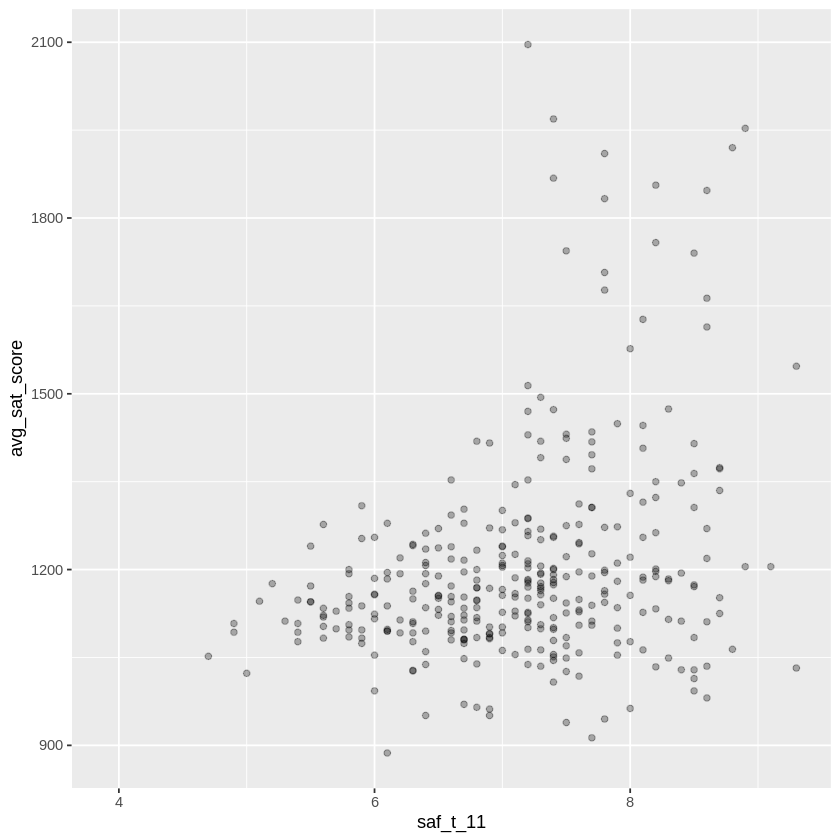

Warning message:
“Removed 139 rows containing missing values or values outside the scale range
(`geom_point()`).”


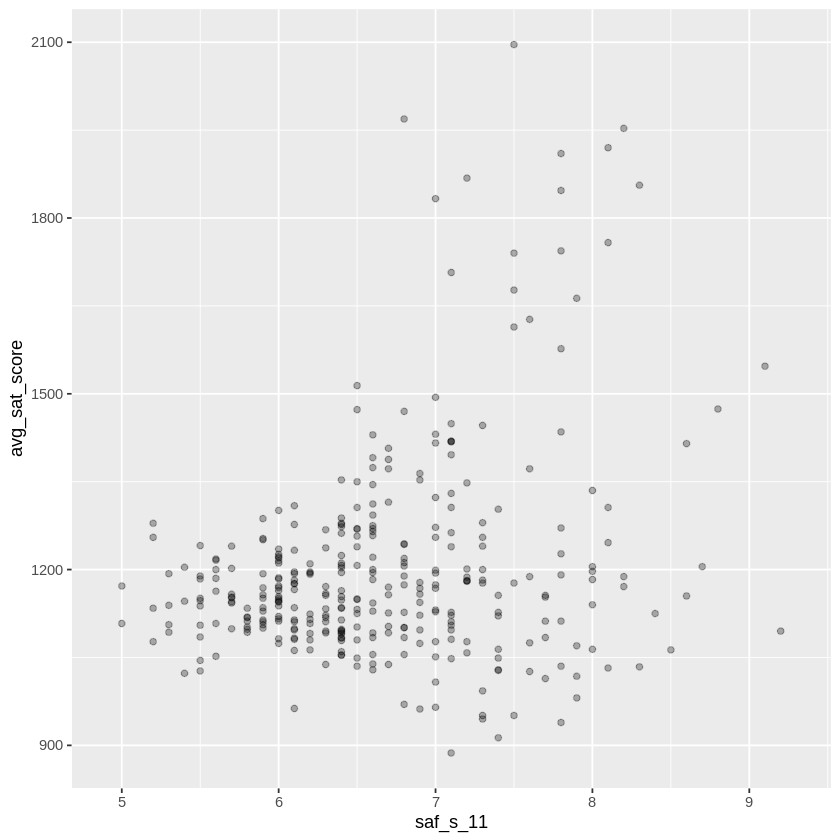

Warning message:
“Removed 137 rows containing missing values or values outside the scale range
(`geom_point()`).”


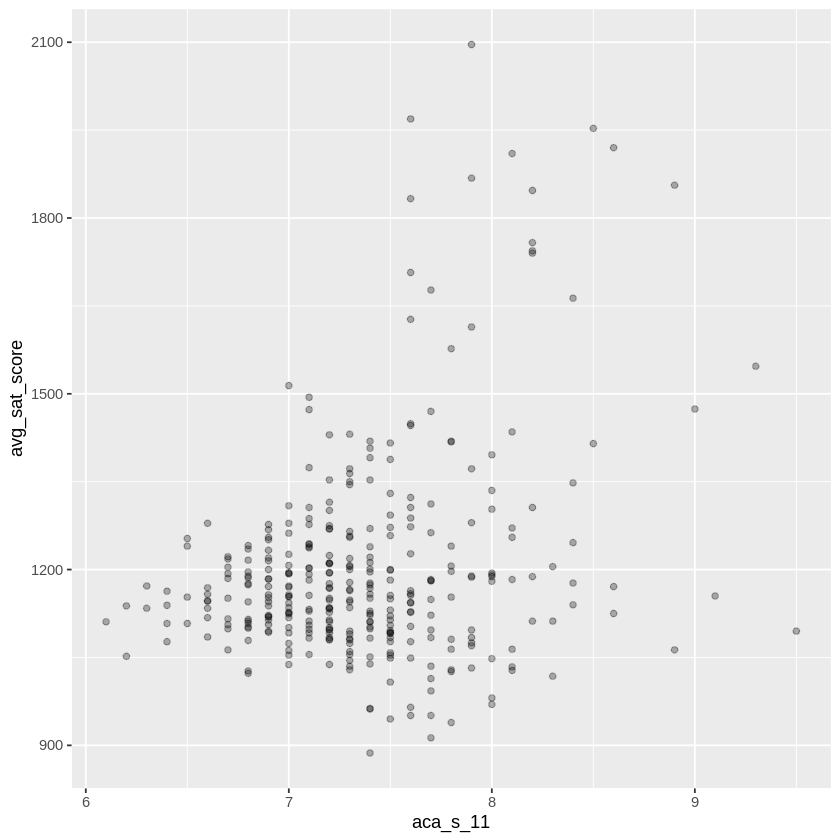

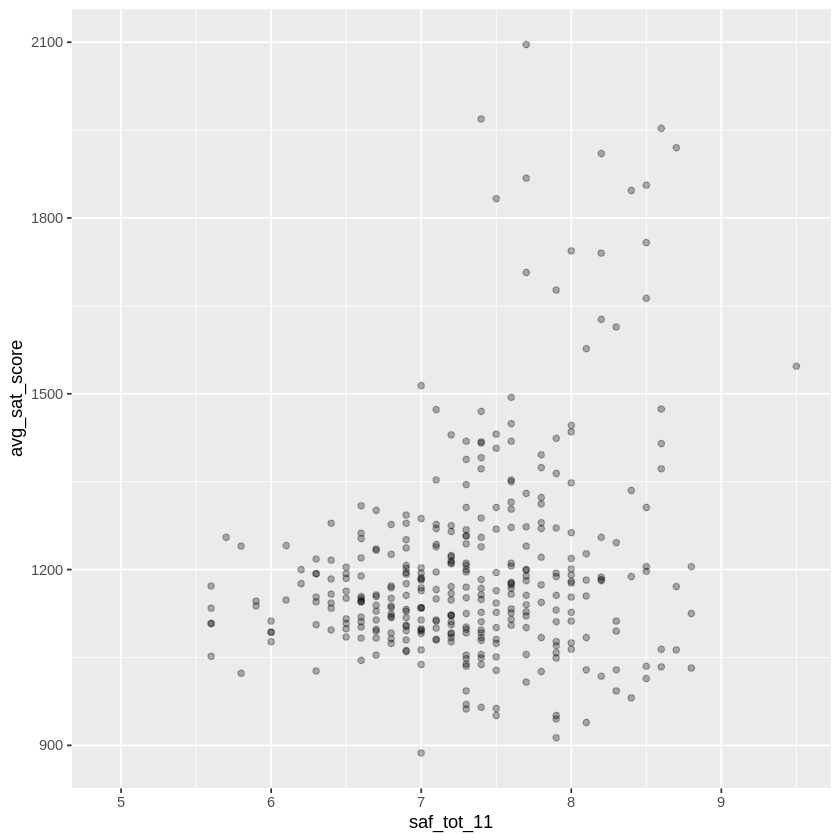

In [ ]:
# creating a scatter plot for said strong relations
plots_list <- list()

for (var in strong_cors$variable[2:5]) {
  p <- ggplot(data = combined_survey) +
    aes_string(x = var, y = "avg_sat_score") +
    geom_point(alpha = 0.3)
     # Append the plot to the list
  plots_list <- c(plots_list, list(p))
}

# Print the scatter plots
for (p in plots_list) {
  print(p)
}

after finding the correlation we can see the perceptions of student, teacher, and parent on NYC school quality appears to be related to demographic and academic success metrics. so the answer to our first question is yes perceptions on school quality are related to demographic and academic success metrics.

In [ ]:
# reshaping the data so that we can investigate differences in student, parent, and teacher responses to survey questions.
combined_survey_gather  <- combined_survey %>%
  pivot_longer(cols = saf_p_11:aca_tot_11,
               names_to = "survey_question",
               values_to = "score")

In [ ]:
# creating new variables: response type which indicates the responder and metric to indicate wether the response is commenting on "engagement" or "academic expectations" or "safety and respect" or "communication"
combined_survey_gather <- combined_survey_gather %>%
  mutate(response_type = str_sub(survey_question, 4, 6)) %>%
  mutate(question = str_sub(survey_question, 1, 3))

In [ ]:
# replacing `response_type` variable values with names "parent", "teacher", "student", "total" using `if_else()` function.

combined_survey_gather <- combined_survey_gather %>%
  mutate(response_type = ifelse(response_type  == "_p_", "parent",
                                ifelse(response_type == "_t_", "teacher",
                                       ifelse(response_type == "_s_", "student",
                                              ifelse(response_type == "_to", "total", "NA")))))

Warning message:
“Removed 1268 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


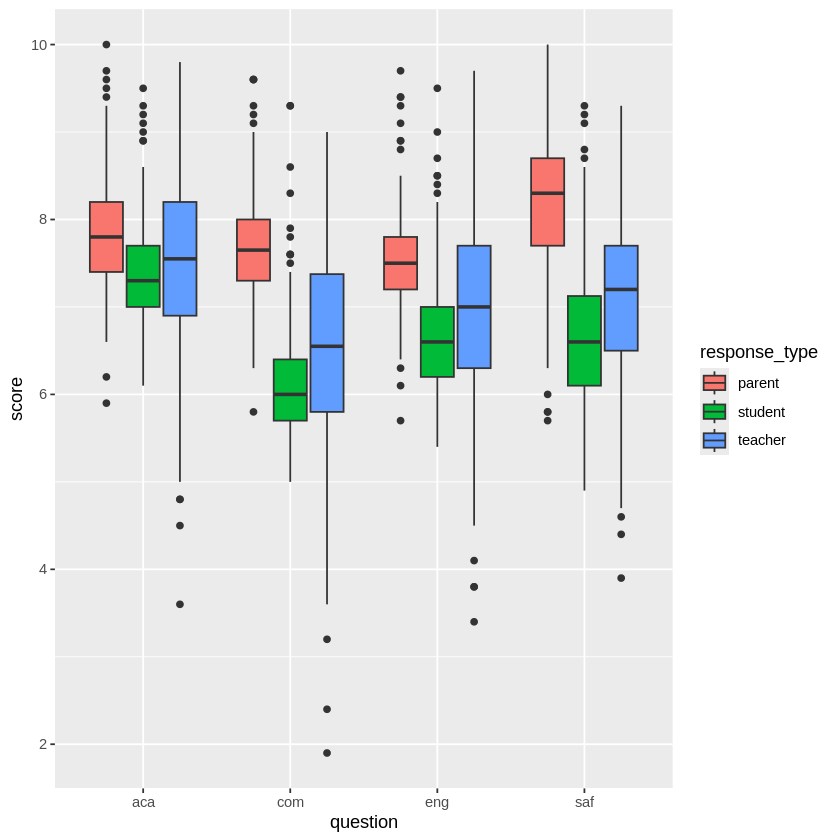

In [ ]:
# creating a boxplot to see if there appear to be differences in how the three groups of responders (parents, students, and teachers) answered the four questions.

combined_survey_gather %>%
  filter(response_type != "total") %>%
  ggplot(aes(x = question, y = score, fill = response_type)) +
  geom_boxplot()

We can see that the perception of parents, teachers and students varies with the quality metrics of NYC Schools that they were surveyed. parents tends to give higher score among others responden. Student are generally giving lower score, and
teacher are giving score in wide variation of score. HIghest score metric is safety and respect, the lowest is
commnication metric of survey. so the answer to the second question is no, each respondent category have different perceptions of NYC school quality.